In [8]:
import requests

url = 'https://api.stackexchange.com/2.3/tags'
params = {
    'site': 'stackoverflow',
    'order': 'desc',
    'sort': 'popular',
    'pagesize': 100
}


In [9]:
response = requests.get(url, params=params)



In [10]:
response

<Response [200]>

In [11]:
data = response.json()


In [12]:
data

{'items': [{'has_synonyms': True,
   'is_moderator_only': False,
   'is_required': False,
   'count': 2493483,
   'name': 'javascript'},
  {'has_synonyms': True,
   'is_moderator_only': False,
   'is_required': False,
   'count': 2133741,
   'name': 'python'},
  {'has_synonyms': True,
   'is_moderator_only': False,
   'is_required': False,
   'count': 1896444,
   'name': 'java'},
  {'has_synonyms': True,
   'is_moderator_only': False,
   'is_required': False,
   'count': 1590738,
   'name': 'c#'},
  {'has_synonyms': True,
   'is_moderator_only': False,
   'is_required': False,
   'count': 1458497,
   'name': 'php'},
  {'has_synonyms': True,
   'is_moderator_only': False,
   'is_required': False,
   'count': 1403815,
   'name': 'android'},
  {'has_synonyms': True,
   'is_moderator_only': False,
   'is_required': False,
   'count': 1173281,
   'name': 'html'},
  {'has_synonyms': True,
   'is_moderator_only': False,
   'is_required': False,
   'count': 1033838,
   'name': 'jquery'},
  {'h

In [13]:
import pandas as pd

tags = pd.DataFrame(data['items'], columns=['name', 'count'])


In [14]:
tags

,name,count
0,javascript,2493483
1,python,2133741
2,java,1896444
3,c#,1590738
4,php,1458497
...,...,...
95,linq,85826
96,facebook,85710
97,qt,85094
98,dictionary,84977


In [15]:
import sqlite3

conn = sqlite3.connect('stackoverflow.db')
tags.to_sql('tags', conn, if_exists='replace')


100

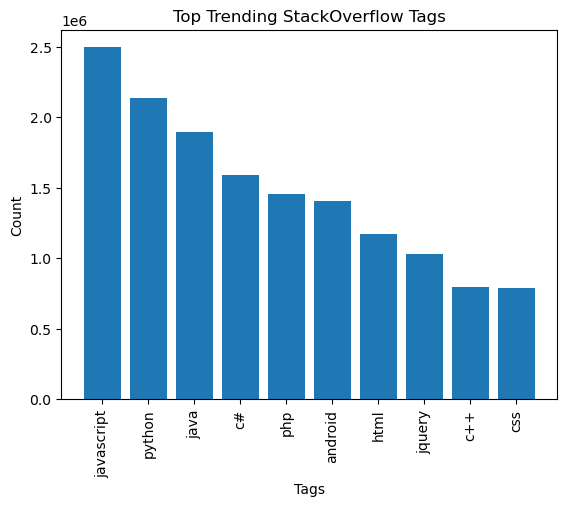

In [16]:
import matplotlib.pyplot as plt

top_tags = tags.head(10)
plt.bar(top_tags['name'], top_tags['count'])
plt.xticks(rotation=90)
plt.xlabel('Tags')
plt.ylabel('Count')
plt.title('Top Trending StackOverflow Tags')
plt.show()
